# クラスタ分析

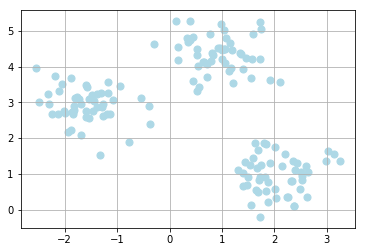

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples = 150,
                  n_features = 2,
                  centers = 3,
                  cluster_std = 0.5,
                  shuffle = True,
                  random_state = 0)

plt.scatter(X[:, 0], X[:, 1], c = 'lightblue', marker = 'o', s = 50)
plt.grid()
plt.show()

In [7]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters = 3,
            init = 'random',
            n_init = 10,
            max_iter = 300,
            tol = 1e-04,
            random_state = 0)
y_km = km.fit_predict(X)

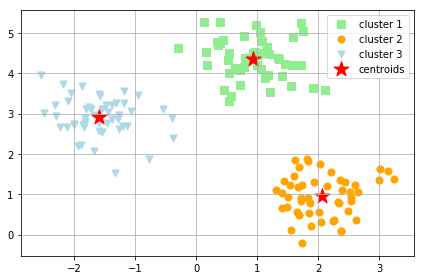

In [8]:
plt.scatter(X[y_km == 0, 0],
            X[y_km == 0, 1],
            s = 50,
            c = 'lightgreen',
            marker = 's',
            label = 'cluster 1')
plt.scatter(X[y_km == 1, 0],
            X[y_km == 1, 1],
            s = 50,
            c = 'orange',
            marker = 'o',
            label = 'cluster 2')
plt.scatter(X[y_km == 2, 0],
            X[y_km == 2, 1],
            s = 50,
            c = 'lightblue',
            marker = 'v',
            label = 'cluster 3')
plt.scatter(km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 1],
            s = 250,
            marker = '*',
            c = 'red',
            label = 'centroids')
plt.legend()
plt.show()

In [10]:
print('Distoration: %.2f' % km.inertia_)

Distoration: 72.48


### エルボー法

In [11]:
distorations = []
for i in range(1, 11):
    km = KMeans(n_clusters = i,
                init = 'k-means++',
                n_init = 10,
                max_iter = 300,
                random_state = 0)
    km.fit(X)
    distorations.append(km.inertia_)

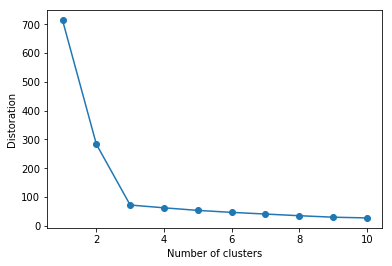

In [12]:
plt.plot(range(1, 11), distorations, marker = 'o')
plt.xlabel('Number of clusters')
plt.ylabel('Distoration')
plt.show()

### シルエット図

In [15]:
km = KMeans(n_clusters = 3,
            init = 'k-means++',
            n_init = 10,
            max_iter = 300,
            tol = 1e-04,
            random_state = 0)
y_km = km.fit_predict(X)

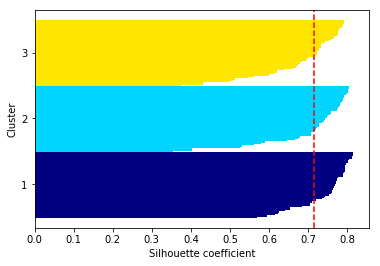

In [18]:
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples

cluster_labels = np.unique(y_km)
n_clusters = cluster_label.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric = 'euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks =[]

for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper),
             c_silhouette_vals,
             height = 1.0,
             edgecolor = 'none',
             color = color)
    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()

悪いクラスタリングの場合

In [19]:
km = KMeans(n_clusters = 2,
            init = 'k-means++',
            n_init = 10,
            max_iter = 300,
            tol = 1e-04,
            random_state = 0)
y_km = km.fit_predict(X)

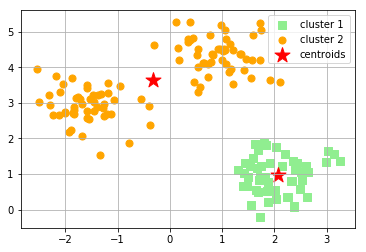

In [20]:
plt.scatter(X[y_km == 0, 0],
            X[y_km == 0, 1],
            s=50,
            c='lightgreen',
            marker='s',
            label='cluster 1')
plt.scatter(X[y_km == 1, 0],
            X[y_km == 1, 1],
            s = 50,
            c = 'orange',
            marker = 'o',
            label = 'cluster 2')

plt.scatter(km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 1],
            s = 250,
            marker = '*',
            c = 'red',
            label = 'centroids')
plt.legend()
plt.show()

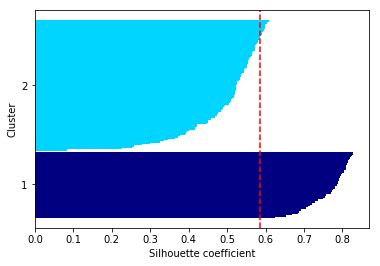

In [21]:
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples

cluster_labels = np.unique(y_km)
n_clusters = cluster_label.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric = 'euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks =[]

for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper),
             c_silhouette_vals,
             height = 1.0,
             edgecolor = 'none',
             color = color)
    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()

## クラスタを階層木として構成
- ### 凝集型
    - 単連結法：最も類似度の高いメンバー同士の距離が最小になるように
    - 完全連結法：最も類似度の低いメンバーの比較
- ### 分割型

In [22]:
import pandas as pd
import numpy as np

np.random.seed(123)
variables = ['X', 'Y', 'Z']
labels = ['ID_0', 'ID_1', 'ID_2', 'ID_3', 'ID_4']
X = np.random.random_sample([5, 3])*10
df = pd.DataFrame(X, columns = variables, index = labels)
df

,X,Y,Z
ID_0,6.964692,2.861393,2.268515
ID_1,5.513148,7.194690,4.231065
ID_2,9.807642,6.848297,4.809319
ID_3,3.921175,3.431780,7.290497
ID_4,4.385722,0.596779,3.980443


### 距離行列で階層的クラスタリング

In [23]:
from scipy.spatial.distance import pdist, squareform

row_dist = pd.DataFrame(squareform(pdist(df, metric = 'euclidean')),
                        columns = labels, index = labels)
row_dist

,ID_0,ID_1,ID_2,ID_3,ID_4
ID_0,0.000000,4.973534,5.516653,5.899885,3.835396
ID_1,4.973534,0.000000,4.347073,5.104311,6.698233
ID_2,5.516653,4.347073,0.000000,7.244262,8.316594
ID_3,5.899885,5.104311,7.244262,0.000000,4.382864
ID_4,3.835396,6.698233,8.316594,4.382864,0.000000


In [26]:
from scipy.cluster.hierarchy import linkage
row_clusters = linkage(df.values, method = 'complete', metric = 'euclidean')
pd.DataFrame(row_clusters,
             columns = ['row label 1',
                        'row label 2',
                        'distance',
                        'no. of items in clust.'],
             index = ['cluster %d' %(i + 1) for i in range(row_clusters.shape[0])])

,row label 1,row label 2,distance,no. of items in clust.
cluster 1,0.0,4.0,3.835396,2.0
cluster 2,1.0,2.0,4.347073,2.0
cluster 3,3.0,5.0,5.899885,3.0
cluster 4,6.0,7.0,8.316594,5.0


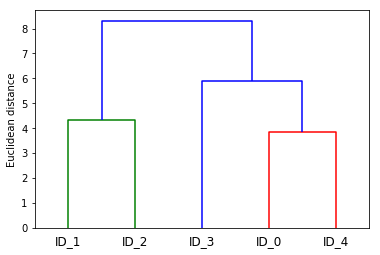

In [28]:
from scipy.cluster.hierarchy import dendrogram

row_dendr = dendrogram(row_clusters,
                       labels = labels)
plt.ylabel('Euclidean distance')
plt.show()

### 樹形図をヒートマップと組み合わせる

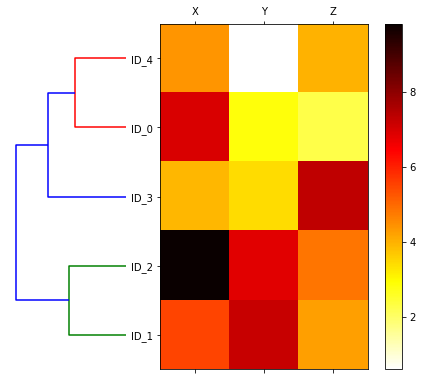

In [38]:
# 1. 新しいfigureオブジェクトを作成し，add_axes属性を使って樹形図の位置，幅，高さを定義
fig = plt.figure(figsize = (8, 8), facecolor = 'white')
axd = fig.add_axes([0.09, 0.1, 0.2, 0.6])


row_dendr = dendrogram(row_clusters, orientation = 'left')

# 3. データを並べ替えたDataFrameオブジェクトを使ってヒートマップを作成
df_rowclust = df.ix[row_dendr['leaves'][::-1]]
axm = fig.add_axes([0.23, 0.1, 0.6, 0.6])

# 4. ヒートマップの外観を整える
cax = axm.matshow(df_rowclust, interpolation = 'nearest', cmap = 'hot_r')
axd.set_xticks([])
axd.set_yticks([])
for i in axd.spines.values():
    i.set_visible(False)
fig.colorbar(cax)
axm.set_xticklabels([''] + list(df_rowclust.columns))
axm.set_yticklabels([''] + list(df_rowclust.index))
plt.show()

### scikit-learnを使って凝集型階層的クラスタリング

In [39]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters = 2,
                             affinity = 'euclidean',
                             linkage = 'complete')
labels = ac.fit_predict(X)
print('Cluster labels: %s' % labels)

Cluster labels: [0 1 1 0 0]


樹形図で観測した結果と同じ

## DBSCAN

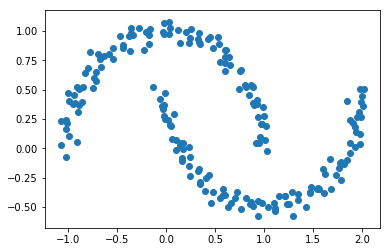

In [40]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples = 200,
                  noise = 0.05,
                  random_state = 0)

plt.scatter(X[:, 0], X[:, 1])
plt.show()

k-means法と完全連結法

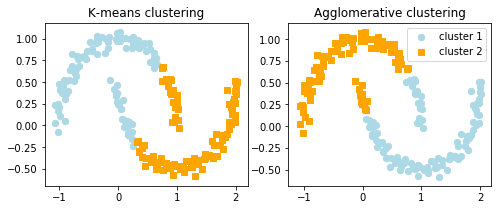

In [41]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (8, 3))
km = KMeans(n_clusters = 2, random_state = 0)
y_km = km.fit_predict(X)

ax1.scatter(X[y_km == 0, 0],
            X[y_km == 0, 1],
            s = 40,
            c = 'lightblue',
            marker = 'o',
            label = 'cluster 1')
ax1.scatter(X[y_km == 1, 0],
            X[y_km == 1, 1],
            s = 40,
            c = 'orange',
            marker = 's',
            label = 'cluster 2')
ax1.set_title('K-means clustering')
ac = AgglomerativeClustering(n_clusters = 2,
                             affinity = 'euclidean',
                             linkage = 'complete')
y_ac = ac.fit_predict(X)
ax2.scatter(X[y_ac == 0, 0],
            X[y_ac == 0, 1],
            s = 40,
            c = 'lightblue',
            marker = 'o',
            label = 'cluster 1')
ax2.scatter(X[y_ac == 1, 0],
            X[y_ac == 1, 1],
            s = 40,
            c = 'orange',
            marker = 's',
            label = 'cluster 2')
ax2.set_title('Agglomerative clustering')

plt.legend()
plt.show()

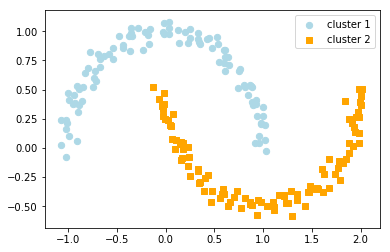

In [42]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps = 0.2,
            min_samples = 5,
            metric = 'euclidean')
y_db = db.fit_predict(X)
plt.scatter(X[y_db == 0, 0],
            X[y_db == 0, 1],
            s = 40,
            c = 'lightblue',
            marker = 'o',
            label = 'cluster 1')
plt.scatter(X[y_db == 1, 0],
            X[y_db == 1, 1],
            s = 40,
            c = 'orange',
            marker = 's',
            label = 'cluster 2')

plt.legend()
plt.show()